# 1.0 Import Libraries

In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 2.0 Import Data

In [8]:
# Define project folder path
path = r'/Users/sharnti/Desktop/CareerFoundry/Data Immersion/Achievement 4/Instacart Basket Analysis'

In [9]:
# Import orders_products_combined dataframe
cust_ords_prods_combined= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'custs_ords_prods_combined.pkl'))

In [10]:
# View rows, columns
cust_ords_prods_combined.shape

(32404859, 34)

In [11]:
# View sample of import to check it worked
cust_ords_prods_combined.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,num_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [12]:
# Check that the price outliers have been assigned NaN
cust_ords_prods_combined['prices'].max()

25.0

# 3.0 Redo Charts from Task 4.9 With Colours, Titles and Labels

## 3.1 Bar Chart - Days of Week

Text(0.5, 1.0, 'Orders by Day of Week')

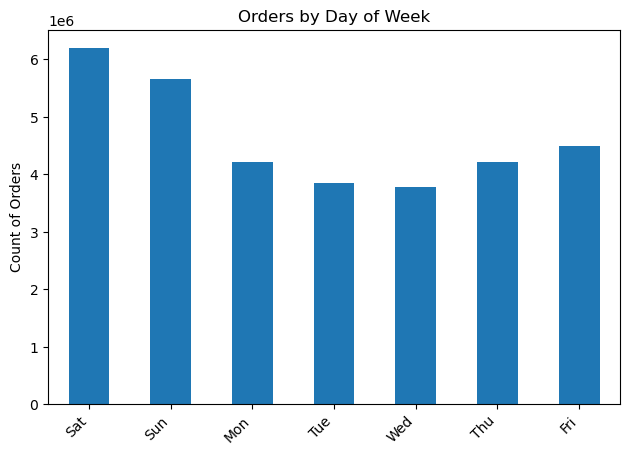

In [15]:
# Save the chart using 'bar_orders_dow' object.
bar_orders_dow = cust_ords_prods_combined['orders_day_of_week'].value_counts().sort_index().plot.bar()

# Add y-axis label
bar_orders_dow.set_ylabel('Count of Orders')  # Replace with an appropriate label

# Rotate x-axis labels and adjust layout
bar_orders_dow.set_xticks([0,1,2,3,4,5,6,],labels=['Sat','Sun','Mon','Tue','Wed','Thu','Fri'], rotation=45, ha='right')  # Rotate labels
bar_orders_dow.figure.tight_layout()  # Ensure elements fit properly

# Hide the x-label
plt.xlabel('')

# Set title
plt.title('Orders by Day of Week')

In [16]:
# Export chart to project folder
bar_orders_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# 3.2 Histogram of orders by hour

Text(0.5, 1.0, 'Orders by Hour of Day')

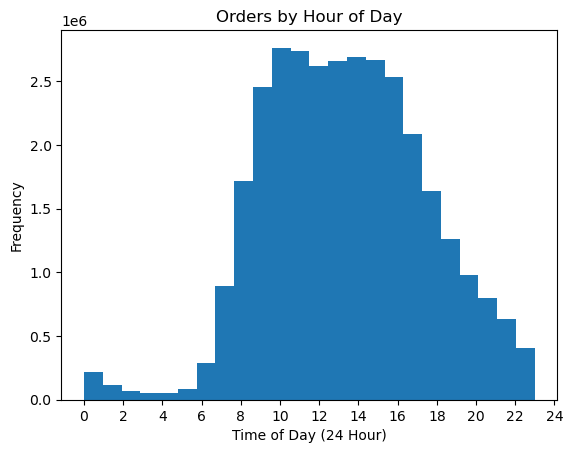

In [33]:
# Create a histogram of the prices column
hist_ords_hour_of_day = cust_ords_prods_combined['order_hour_of_day'].plot.hist(bins = 24)

# Add y-axis label
hist_ords_hour_of_day.set_ylabel('Frequency')  # Replace with an appropriate label

# Set x-axis ticks
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])  # Custom tick positions

# Set x-label
plt.xlabel('Time of Day (24 Hour)')

# Set title
plt.title('Orders by Hour of Day')

In [35]:
# Export chart to project folder
hist_ords_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_ords_hour_of_day.png'))

## 3.3 Line charts for expenditure

### Expenditure by day

In [40]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(cust_ords_prods_combined)) <= 0.7

In [42]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [44]:
# Store 70% of the sample in the dataframe big
big = cust_ords_prods_combined[dev]

In [45]:
# Store 30% of the sample in the dataframe small
small = cust_ords_prods_combined[~dev]

In [46]:
# Check the length of the original dataframe
len(cust_ords_prods_combined)

32404859

In [48]:
# Check the length of the big sample and small sample combined
len(small) + len(big)

32404859

In [52]:
# Reduce small dataframe to include only target columns
df_2 = small[['orders_day_of_week','prices']]

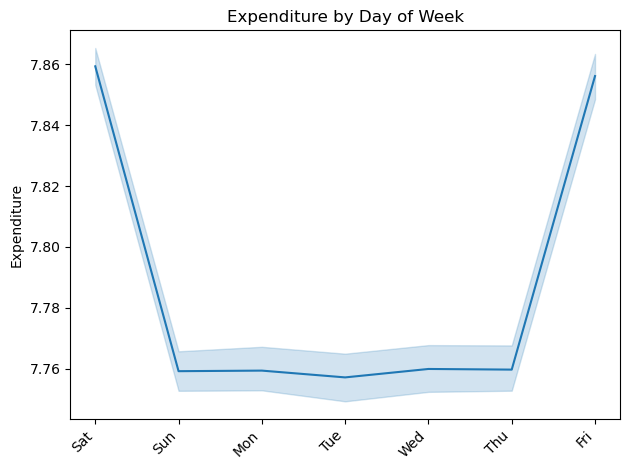

In [79]:
# Create line graph of expenditure by day
line_daily_expenditure = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

# Add y-axis label
line_daily_expenditure.set_ylabel('Expenditure')  # Replace with an appropriate label

# Hide the x-label
plt.xlabel('')

# Set title
plt.title('Expenditure by Day of Week')

# Rotate x-axis labels and adjust layout
line_daily_expenditure.set_xticks([0,1,2,3,4,5,6,],labels=['Sat','Sun','Mon','Tue','Wed','Thu','Fri'], rotation=45, ha='right')  # Rotate labels
line_daily_expenditure.figure.tight_layout()  # Ensure elements fit properly

In [81]:
# Export chart to project folder
line_daily_expenditure.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_daily_expenditure.png'))

### Expenditure by hour

In [72]:
# Reduce small dataframe to include only target columns
df_3 = small[['order_hour_of_day','prices']]

In [73]:
# Check subset worked
df_3.head()

,order_hour_of_day,prices
0,8,9.0
2,8,4.4
3,8,4.7
6,7,3.0
10,7,4.0


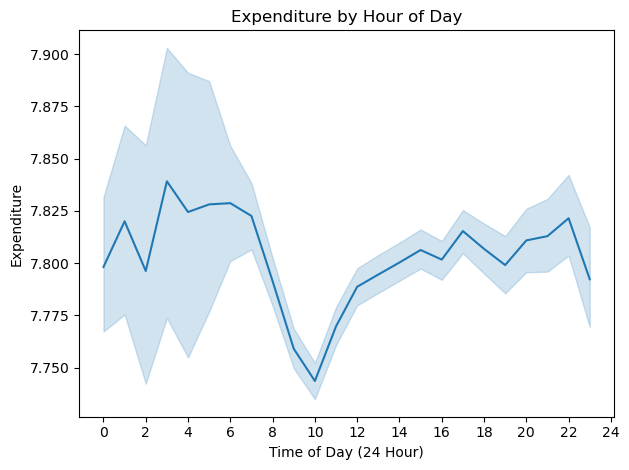

In [83]:
# Create line graph based on expenditure per hour of day
line_hourly_expenditure = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

# Add y-axis label
line_hourly_expenditure.set_ylabel('Expenditure')  # Replace with an appropriate label

# Set x-axis ticks
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24])  # Custom tick positions

# Set title
plt.title('Orders by Hour of Day')

# Set title
plt.title('Expenditure by Hour of Day')

# Set x-label
plt.xlabel('Time of Day (24 Hour)')
line_hourly_expenditure.figure.tight_layout()  # Ensure elements fit properly

In [85]:
# Export chart to project folder
line_hourly_expenditure.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hourly_expenditure.png'))

## 3.4 Loyalty Bar Charts

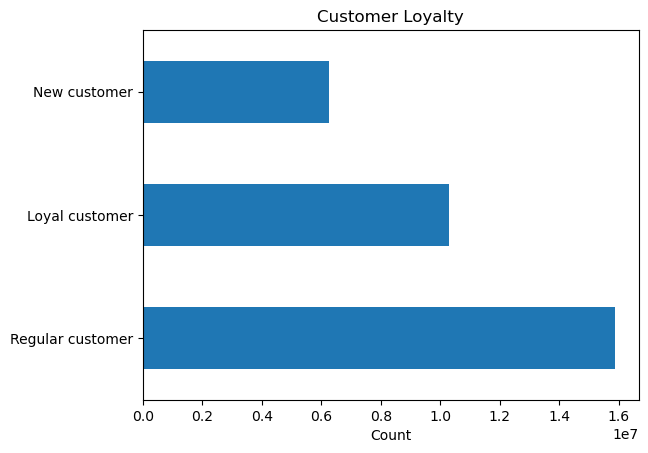

In [108]:
# Create a bar chart with sort index
bar_loyalty_flag = cust_ords_prods_combined['loyalty_flag'].value_counts().sort_values(ascending=False).plot.barh()

# setting label of y-axis
plt.ylabel("")
 
# setting label of x-axis
plt.xlabel("Count") 
plt.title("Customer Loyalty")
plt.show()

bar_loyalty_flag.figure.tight_layout()  # Ensure elements fit properly

In [110]:
# Export chart to project folder
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

## How often people return

In [122]:
# Create a subset to exclude first orders
return_customers = cust_ords_prods_combined[cust_ords_prods_combined['first_order'] == False]

In [124]:
# Check this worked
return_customers.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,num_dependants,fam_status,income,_merge
5,2398795,1,2,3,7,15.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
6,2398795,1,2,3,7,15.0,False,10258,2,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
7,2398795,1,2,3,7,15.0,False,12427,3,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
8,2398795,1,2,3,7,15.0,False,13176,4,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
9,2398795,1,2,3,7,15.0,False,26088,5,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


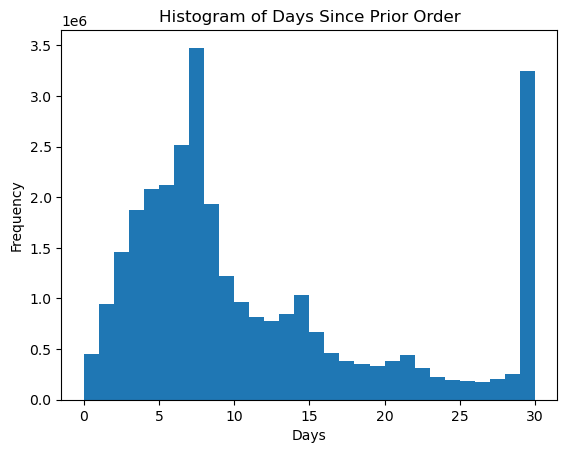

In [128]:
# Create a histogram of the days_since_prior_order
hist_return_customers = return_customers['days_since_prior_order'].plot.hist(bins = 30)

# setting label of x-axis
plt.xlabel("Days") 
plt.title("Histogram of Days Since Prior Order")
plt.show()

hist_return_customers.figure.tight_layout()  # Ensure elements fit properly

In [150]:
# Export chart to project folder
hist_return_customers.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_return_customers.png'))

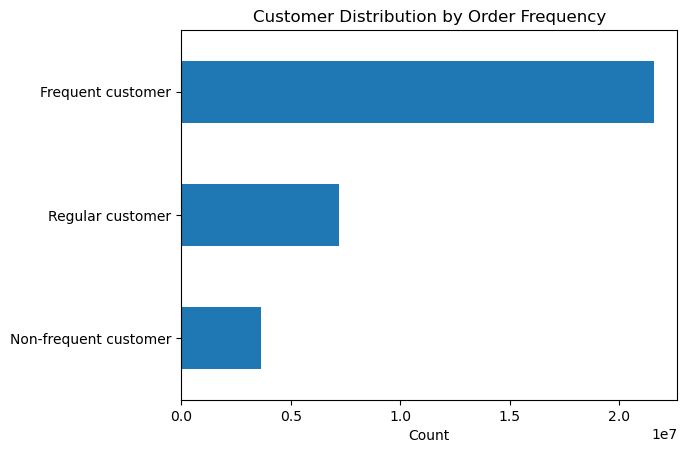

In [146]:
# Create a bar chart with sort index
bar_frequency = cust_ords_prods_combined['frequency_flag'].value_counts().sort_values().plot.barh()

# setting label of y-axis
plt.ylabel("")
 
# setting label of x-axis
plt.xlabel("Count") 
plt.title("Customer Distribution by Order Frequency")
plt.show()

bar_frequency.figure.tight_layout()  # Ensure elements fit properly

In [148]:
# Export chart to project folder
bar_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_frequency.png'))